In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
returns = pd.read_excel('Return rate (test) (1).xlsx', header=1)

In [15]:
returns

,Dates - MonthName deliv,Dates - status_dt_clean,Return Rate ib deliv,Категория
0,January,01.01.2025,0.002227,ACCESSORIES
1,January,01.01.2025,0.001961,CLOTHES
2,January,01.01.2025,0.002646,FOOTWEAR
3,January,01.01.2025,0.000000,HOME
4,January,01.01.2025,0.003937,PERFUME & BEAUTY
...,...,...,...,...
822,May,18.05.2025,0.148148,ACCESSORIES
823,May,18.05.2025,0.037037,CLOTHES
824,May,18.05.2025,0.000000,FOOTWEAR
825,May,18.05.2025,0.000000,HOME


In [121]:
reject = pd.read_excel('Rejection rate (test).xlsx', header=2)
reject

,Dates - MonthName deliv,Dates - Week_Start,Dates - status_dt_clean,Rejection Rateib deliv,Категория 2 уровня
0,January,2024-12-30,01.01.2025,0.000000,NaN
1,January,2024-12-30,01.01.2025,0.476615,ACCESSORIES
2,January,2024-12-30,01.01.2025,0.550980,CLOTHES
3,January,2024-12-30,01.01.2025,0.617725,FOOTWEAR
4,January,2024-12-30,01.01.2025,0.231884,HOME
...,...,...,...,...,...
960,May,2025-05-12,18.05.2025,0.000000,ACCESSORIES
961,May,2025-05-12,18.05.2025,0.000000,CLOTHES
962,May,2025-05-12,18.05.2025,0.000000,FOOTWEAR
963,May,2025-05-12,18.05.2025,0.000000,HOME


## 1.	Проанализируйте файлы. Какие выводы о поведении и привычках покупателей можно сделать? 

оценим доли возвратов и отказов по категориям товаров:

In [34]:
ret_cat = returns.groupby('Категория')['Return Rate ib deliv'].mean().sort_values(ascending=False)
rej_cat = reject.groupby('Категория 2 уровня')['Rejection Rateib deliv'].mean().sort_values(ascending=False)

print('Средняя доля возвратов по категориям:\n', ret_cat.to_string(header=False))
print('Средняя доля отказов по категориям:\n', rej_cat.to_string(header=False))

Средняя доля возвратов по категориям:
 CLOTHES             0.034447
ACCESSORIES         0.034432
FOOTWEAR            0.032241
HOME                0.012605
TOYS                0.012215
PERFUME & BEAUTY    0.000850
Средняя доля отказов по категориям:
 FOOTWEAR            0.542433
CLOTHES             0.487833
ACCESSORIES         0.418253
HOME                0.151709
TOYS                0.094907
PERFUME & BEAUTY    0.057056


оценим доли возвратов и отказов по месяцам:

In [30]:
ret_month = returns.groupby(returns['Dates - MonthName deliv'])['Return Rate ib deliv'].mean().sort_values(ascending=False)
rej_month = reject.groupby(reject['Dates - MonthName deliv'])['Rejection Rateib deliv'].mean().sort_values(ascending=False)

print('Средняя доля возвратов по месяцам:\n', ret_month.to_string(header=False))
print('Средняя доля отказов по месяцам:\n', rej_month.to_string(header=False))

Средняя доля возвратов по месяцам:
 January     0.021731
February    0.021569
May         0.021566
April       0.020639
March       0.020413
Средняя доля отказов по месяцам:
 April       0.329752
March       0.329266
January     0.324708
February    0.321834
May         0.317427


оценим доли возвратов и отказов по дням недели:

In [85]:
ret_day = returns.groupby(pd.to_datetime(returns['Dates - status_dt_clean'], 
    format='%d.%m.%Y').dt.day_name())['Return Rate ib deliv'].mean().sort_values(ascending=False)
rej_day = reject.groupby(pd.to_datetime(reject['Dates - status_dt_clean'], 
    format='%d.%m.%Y').dt.day_name())['Rejection Rateib deliv'].mean().sort_values(ascending=False)

print('Средняя доля возвратов по дням недели:\n', ret_day.to_string(header=False))
print('Средняя доля отказов по дням недели:\n', rej_day.to_string(header=False))

Средняя доля возвратов по дням недели:
 Wednesday    0.021876
Tuesday      0.021490
Sunday       0.021232
Monday       0.021224
Thursday     0.021162
Friday       0.020745
Saturday     0.020291
Средняя доля отказов по дням недели:
 Saturday     0.332753
Wednesday    0.326953
Friday       0.325648
Monday       0.325395
Tuesday      0.324460
Sunday       0.321255
Thursday     0.320596


визуализация:

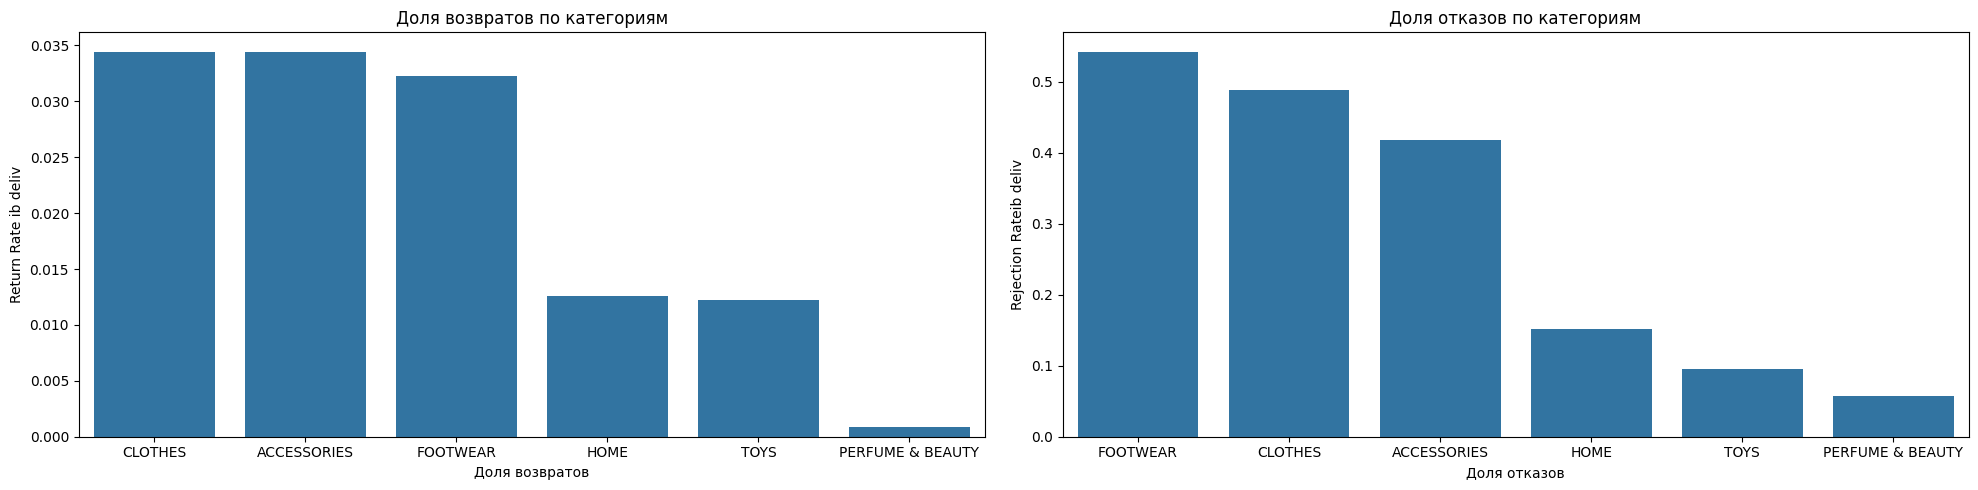

In [63]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=pd.DataFrame(ret_cat), x = 'Категория', y='Return Rate ib deliv')
plt.title('Доля возвратов по категориям')
plt.xlabel('Доля возвратов')

plt.subplot(1, 2, 2)
sns.barplot(data=pd.DataFrame(rej_cat), x='Категория 2 уровня', y='Rejection Rateib deliv')
plt.title('Доля отказов по категориям')
plt.xlabel('Доля отказов')

plt.tight_layout()
plt.show()

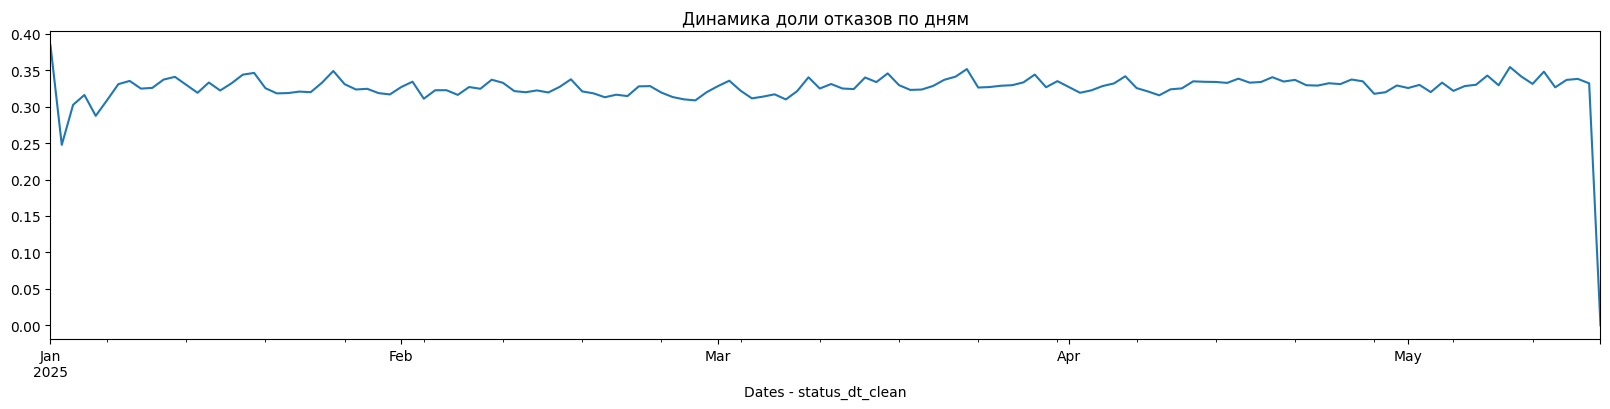

In [79]:
reject.groupby(pd.to_datetime(reject['Dates - status_dt_clean'], 
    format='%d.%m.%Y'))['Rejection Rateib deliv'].mean().plot(kind='line', figsize=(20,4))
plt.title('Динамика доли отказов по дням')
plt.show()

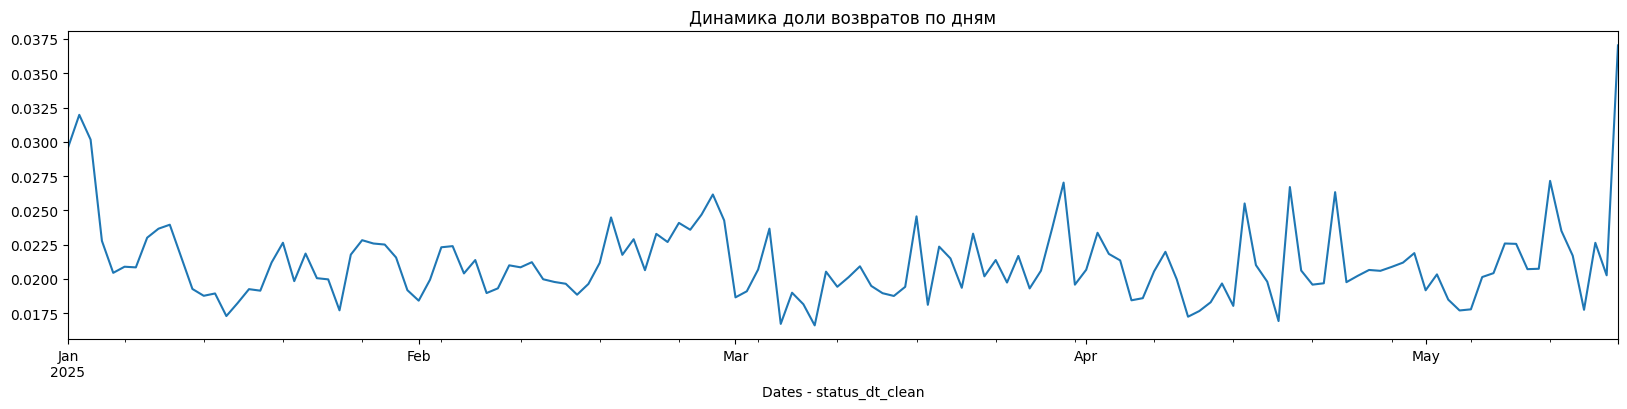

In [82]:
returns.groupby(pd.to_datetime(returns['Dates - status_dt_clean'], 
    format='%d.%m.%Y'))['Return Rate ib deliv'].mean().plot(kind='line', figsize=(20,4))
plt.title('Динамика доли возвратов по дням')
plt.show()

In [86]:
reject_jan = reject[reject['Dates - MonthName deliv'] == 'January']
returns_jan = returns[returns['Dates - MonthName deliv'] == 'January']

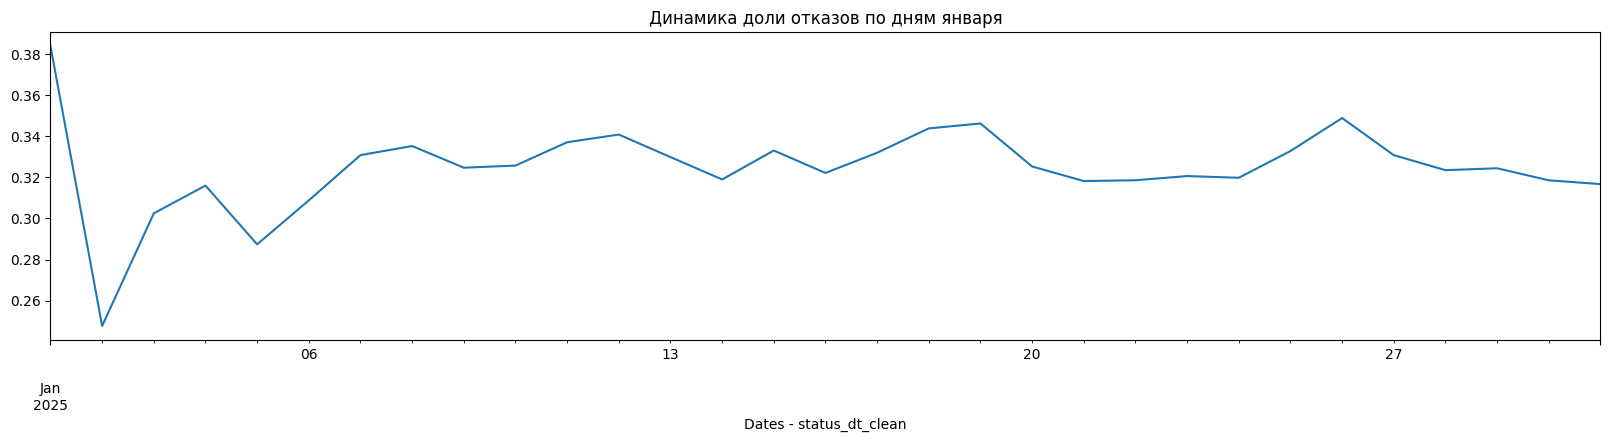

In [91]:
reject_jan.groupby(pd.to_datetime(reject_jan['Dates - status_dt_clean'], 
    format='%d.%m.%Y'))['Rejection Rateib deliv'].mean().plot(kind='line', figsize=(20,4))
plt.title('Динамика доли отказов по дням января')
plt.show()

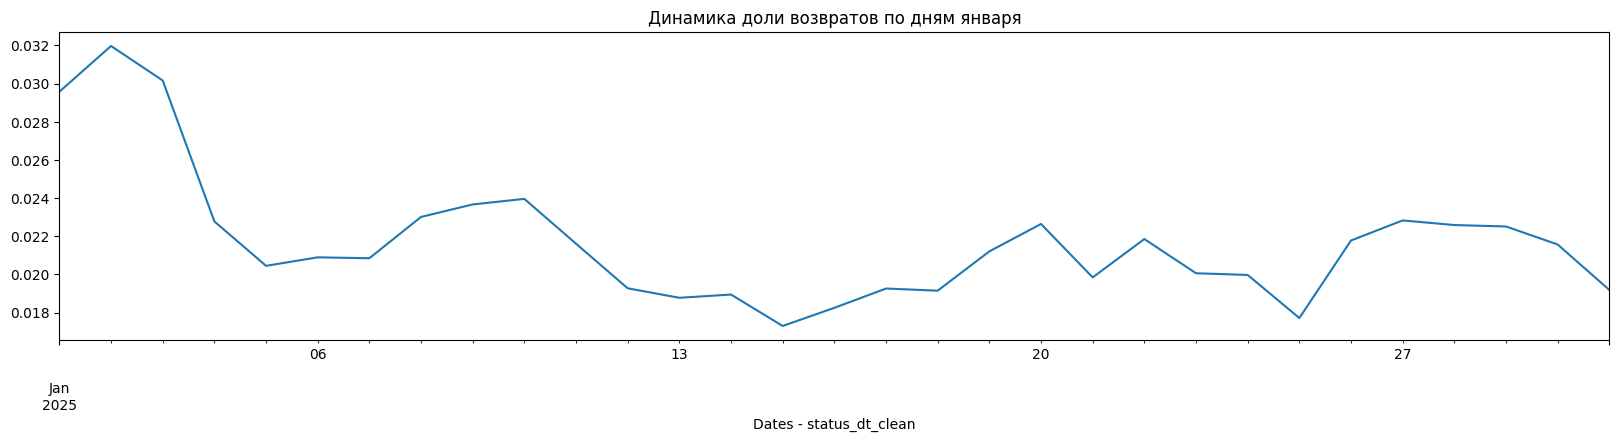

In [90]:
returns_jan.groupby(pd.to_datetime(returns_jan['Dates - status_dt_clean'], 
    format='%d.%m.%Y'))['Return Rate ib deliv'].mean().plot(kind='line', figsize=(20,4))
plt.title('Динамика доли возвратов по дням января')
plt.show()

In [111]:
reject_may = reject[reject['Dates - MonthName deliv'] == 'May']
returns_may = returns[returns['Dates - MonthName deliv'] == 'May']

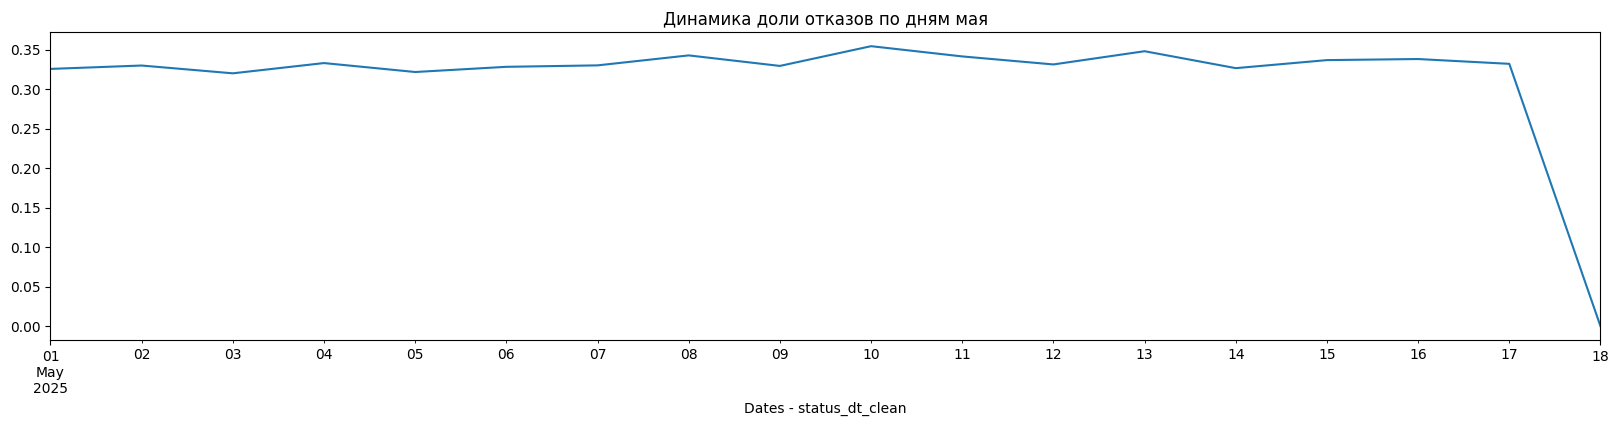

In [112]:
reject_may.groupby(pd.to_datetime(reject_may['Dates - status_dt_clean'], 
    format='%d.%m.%Y'))['Rejection Rateib deliv'].mean().plot(kind='line', figsize=(20,4))
plt.title('Динамика доли отказов по дням мая')
plt.show()

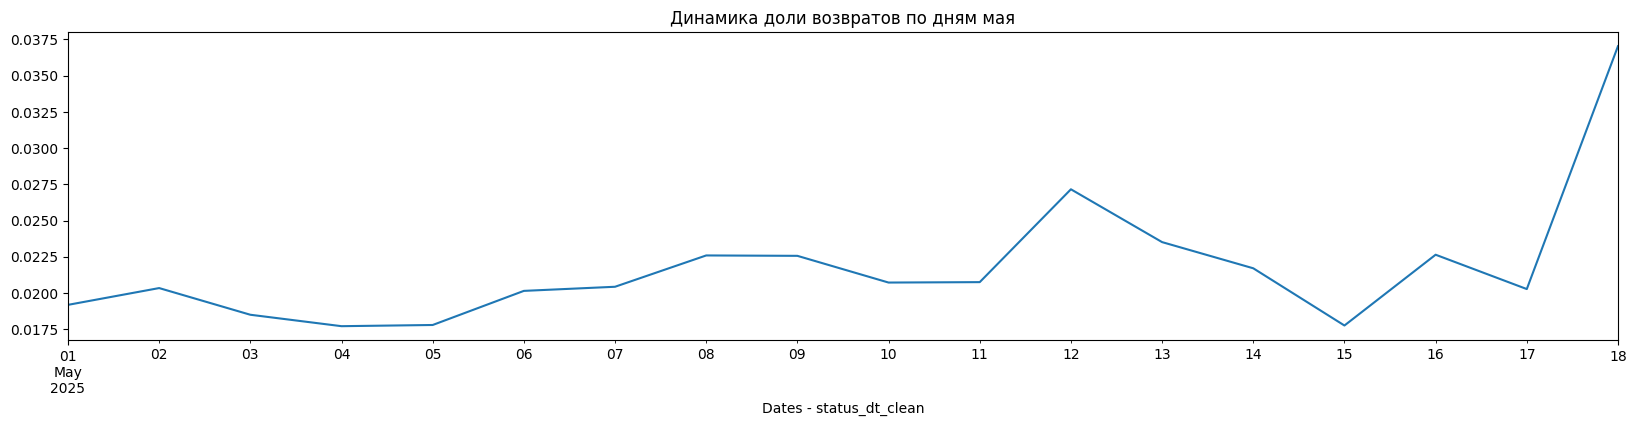

In [114]:
returns_may.groupby(pd.to_datetime(returns_may['Dates - status_dt_clean'], 
    format='%d.%m.%Y'))['Return Rate ib deliv'].mean().plot(kind='line', figsize=(20,4))
plt.title('Динамика доли возвратов по дням мая')
plt.show()

## Выводы:


наблюдается существенная разница в величинах процентов возврата и отказов по разным категориям товаров: возвращают больше всего одежду (в среднем 3%), аксессуары и обувь, отказываются -- от обуви (в среднем 54%), одежды, аксессуаров. Покупатели отказываются от товаров намного чаще, чем возвращают. Возвраты и отказы по месяцам распределены примерно равномерно, по дням недели тоже. Заметно, что доля отказов падает и становится ниже средней во время новогодних праздников, а доля возвратов в этот период -- выше среднемесячной.

## 2. Сформулируйте не менее 5 гипотез, по каким причинам покупатели не выкупают товар или возвращают его. Как можно проверить эти гипотезы? как вы поймете, что гипотеза подтвердилась?

1) Высокие доли отказов в категориях обуви и одежды могут говорить о том, что размерные сетки, публикуемые продавцами, не соответствуют реальным размерам товаров. Чтобы проверить эту гипотезу, можно провести анализ отзывов на наличие жалоб о размерах или предложить покупателям после примерки ответить на вопрос о соответствии товара заявленным размерам. Гипотеза подтвердилась, если процент отказов выше на товарах, соответствие заявленному размеру которых покупатели оценили ниже, при этом доля возвратов ниже для одежды и обуви правильных размеров.
2) Возможно, покупатели чаще не выкупают товары, срок доставки которых велик (они заказывают что-то и, не дождавшись доставки, покупают это в магазине). Чтобы проверить гипотезу, нужно получить данные о сроках доставки и провести корреляционный анализ.
3) Следующая гипотеза: покупатели чаще не выкупают/возвращают товары, купленные в период скидок. Для проверки можно сравнить средние доли отказов и возвратов в периоды акций и обычные дни и оценить, есть ли статистически значимая разница. Гипотеза подтвердилась, если отказы/возвраты коррелируют с акциями и наблюдаются пики после распродаж. Можно предположить, что в периоды распродаж покупки совершаются необдуманно, импульсивно -- проверить это можно, изучив динамику среднего времени нахождения на странице товара перед оформлением заказа. Предположение верно, если эта метрика ниже в периоды акций.
4) Покупатели чаще не выкупают товары, на которых нет или мало отзывов. Для проверки можно либо следить за группами cхожих товаров, но с разным числом отзывов, либо измерять долю отказов с увеличением числа отзывов на товар. Гипотеза подтвердится, если корреляция между количеством отзывов и долей отказов отрицательная и статистически значимая. В свою очередь, это может быть связано с тем, что фото/описание продавца часто не соответствуют реальному состоянию товара (другой цвет, ткань, материалы и т.д.). Для проверки можно провести тест, где одной группе показываются только фото продавца, другой -- более подробный обзор с 360 видео, точными характеристиками в описании товара. Гипотеза подтвердится, если будет статистически значимое повышение доли выкупа для товаров с улучшенной информацией.
5) Покупатели не выкупают/возвращают товары, если видят, что цена на них снизилась, и они могут перезаказать, сэкономив. Для проверки можно выделить группу пользователей, для которой цена не уменьшается после оформления заказа. Если доля отказов/возвратов снизится по сравнению с контрольной групппой в эксперименте, то гипотеза подтверждена.

## 3 Выберите 2-3 гипотезы и, предположив, что они подтвердились, предложите продуктовую доработку для снижения доли отказов и возвратов. Вы можете использовать примеры из знакомых вам приложений или сервисов, или предложить свои

1) Для повышения соответствия карточки товара действительности можно ввести рейтинг продавца на основании оценок покупателями, кнопку жалобы на товар, алгоритм модерации по адекватности цены описанию, бонусы продавцам, прилагающим видеобзор к товару. Чтобы одежда и обувь лучше соответствовали размерному ряду, ввести инструмент на основе искусственного интелекта типа Fit Insights Amazon для стандартизации размерной сетки и анализа отзывов.
2) Чтобы снизить долю отказов и возвратов в связи с желанием перезаказать товар по меньшей цене, можно предлагать выплачивать разницу в цене покупателям.
3) Для снижения возвратов после импульсивных покупок можно ввести ограничения по числу заказываемых акционных товаров, добавить страницу с подтверждением заказа перед оформлением.
